In [1]:
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [2]:
population_data = population_data[(population_data['age'] == 'overall') &
                                    (population_data['ethnicity'] != 'overall')].copy()
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year
population_data.head()

,state,date,sex,age,ethnicity,population,year
481,Johor,1980-01-01,both,overall,bumi,899.7,1980
482,Johor,1980-01-01,both,overall,chinese,634.7,1980
483,Johor,1980-01-01,both,overall,indian,109.3,1980
484,Johor,1980-01-01,both,overall,other,2.5,1980
571,Johor,1980-01-01,female,overall,bumi,450.4,1980


In [3]:
ETHNICITY_MAP = {
    'bumi' : 'Bumiputera',
    'bumi_malay': 'Bumiputera',
    'bumi_other': 'Bumiputera',
    'chinese': 'Chinese',
    'indian': 'Indian',
    'other': 'Other',
    'other_citizen': 'Other',
    'other_noncitizen': 'Other'
}

population_data["ethnicity_group"] = population_data["ethnicity"].map(ETHNICITY_MAP)
population_data.head()

,state,date,sex,age,ethnicity,population,year,ethnicity_group
481,Johor,1980-01-01,both,overall,bumi,899.7,1980,Bumiputera
482,Johor,1980-01-01,both,overall,chinese,634.7,1980,Chinese
483,Johor,1980-01-01,both,overall,indian,109.3,1980,Indian
484,Johor,1980-01-01,both,overall,other,2.5,1980,Other
571,Johor,1980-01-01,female,overall,bumi,450.4,1980,Bumiputera


In [4]:
population_data = population_data.drop(["ethnicity", "date"], axis = 1)
population_data

,state,sex,age,population,year,ethnicity_group
481,Johor,both,overall,899.7,1980,Bumiputera
482,Johor,both,overall,634.7,1980,Chinese
483,Johor,both,overall,109.3,1980,Indian
484,Johor,both,overall,2.5,1980,Other
571,Johor,female,overall,450.4,1980,Bumiputera
...,...,...,...,...,...,...
263548,W.P. Putrajaya,male,overall,1.1,2025,Bumiputera
263549,W.P. Putrajaya,male,overall,0.3,2025,Chinese
263550,W.P. Putrajaya,male,overall,0.7,2025,Indian
263551,W.P. Putrajaya,male,overall,0.1,2025,Other


Group by Both Gender, Male and Female

In [5]:
population_data_overall = population_data[population_data["sex"] == "both"]
population_data_overall

,state,sex,age,population,year,ethnicity_group
481,Johor,both,overall,899.7,1980,Bumiputera
482,Johor,both,overall,634.7,1980,Chinese
483,Johor,both,overall,109.3,1980,Indian
484,Johor,both,overall,2.5,1980,Other
751,Johor,both,overall,925.4,1981,Bumiputera
...,...,...,...,...,...,...
263282,W.P. Putrajaya,both,overall,2.3,2025,Bumiputera
263283,W.P. Putrajaya,both,overall,0.6,2025,Chinese
263284,W.P. Putrajaya,both,overall,1.4,2025,Indian
263285,W.P. Putrajaya,both,overall,0.3,2025,Other


In [6]:
malaysia_ethnicity_data = population_data_overall.groupby(
    ["year", "ethnicity_group"])["population"].sum().reset_index()
malaysia_ethnicity_data

,year,ethnicity_group,population
0,1980,Bumiputera,7926.6
1,1980,Chinese,4460.1
2,1980,Indian,1189.9
3,1980,Other,302.7
4,1981,Bumiputera,8200.7
...,...,...,...
179,2024,Other,3627.8
180,2025,Bumiputera,21761.0
181,2025,Chinese,6849.6
182,2025,Indian,2006.2


In [7]:
population_data_male = population_data[population_data["sex"] == "male"]
population_data_male

,state,sex,age,population,year,ethnicity_group
661,Johor,male,overall,449.3,1980,Bumiputera
662,Johor,male,overall,321.1,1980,Chinese
663,Johor,male,overall,57.2,1980,Indian
664,Johor,male,overall,1.3,1980,Other
931,Johor,male,overall,465.0,1981,Bumiputera
...,...,...,...,...,...,...
263548,W.P. Putrajaya,male,overall,1.1,2025,Bumiputera
263549,W.P. Putrajaya,male,overall,0.3,2025,Chinese
263550,W.P. Putrajaya,male,overall,0.7,2025,Indian
263551,W.P. Putrajaya,male,overall,0.1,2025,Other


In [8]:
population_data_female = population_data[population_data["sex"] == "female"]
population_data_female

,state,sex,age,population,year,ethnicity_group
571,Johor,female,overall,450.4,1980,Bumiputera
572,Johor,female,overall,313.6,1980,Chinese
573,Johor,female,overall,52.1,1980,Indian
574,Johor,female,overall,1.2,1980,Other
841,Johor,female,overall,460.5,1981,Bumiputera
...,...,...,...,...,...,...
263415,W.P. Putrajaya,female,overall,1.3,2025,Bumiputera
263416,W.P. Putrajaya,female,overall,0.3,2025,Chinese
263417,W.P. Putrajaya,female,overall,0.7,2025,Indian
263418,W.P. Putrajaya,female,overall,0.1,2025,Other


In [9]:
malaysia_male_ethnicity_data = population_data_male.groupby(
    ["year", "ethnicity_group"])["population"].sum().reset_index()
malaysia_male_ethnicity_data

,year,ethnicity_group,population
0,1980,Bumiputera,3955.7
1,1980,Chinese,2249.4
2,1980,Indian,614.6
3,1980,Other,172.2
4,1981,Bumiputera,4099.7
...,...,...,...
179,2024,Other,2484.2
180,2025,Bumiputera,11000.1
181,2025,Chinese,3478.4
182,2025,Indian,1004.4


In [10]:
malaysia_female_ethnicity_data = population_data_female.groupby(
    ["year", "ethnicity_group"])["population"].sum().reset_index()
malaysia_female_ethnicity_data

,year,ethnicity_group,population
0,1980,Bumiputera,3971.1
1,1980,Chinese,2210.7
2,1980,Indian,575.0
3,1980,Other,130.5
4,1981,Bumiputera,4101.0
...,...,...,...
179,2024,Other,1143.4
180,2025,Bumiputera,10760.9
181,2025,Chinese,3371.4
182,2025,Indian,1001.9


Plot for Male 

In [11]:
malaysia_male_ethnicity_data_pt = malaysia_male_ethnicity_data.pivot_table("population", index = "year", columns = ["ethnicity_group"], aggfunc="sum")
malaysia_male_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,3955.7,2249.4,614.6,172.2
1981,4099.7,2280.8,625.3,182.8
1982,4251.1,2312.1,636.4,194.4
1983,4406.5,2341.3,646.8,205.9
1984,4567.1,2369.2,656.2,217.6
1985,4739.3,2398.3,666.0,229.5
1986,4919.8,2426.4,676.1,241.9
1987,5103.9,2450.5,686.6,253.9
1988,5287.0,2475.8,696.4,266.5


In [12]:
malaysia_male_ethnicity_data_pt_copy = malaysia_male_ethnicity_data_pt.reset_index()
malaysia_male_ethnicity_data_pt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,3955.7,2249.4,614.6,172.2
1,1981,4099.7,2280.8,625.3,182.8
2,1982,4251.1,2312.1,636.4,194.4
3,1983,4406.5,2341.3,646.8,205.9
4,1984,4567.1,2369.2,656.2,217.6
5,1985,4739.3,2398.3,666.0,229.5
6,1986,4919.8,2426.4,676.1,241.9
7,1987,5103.9,2450.5,686.6,253.9
8,1988,5287.0,2475.8,696.4,266.5
9,1989,5465.9,2505.0,705.4,280.2


Text(0.5, -0.05, 'Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)')

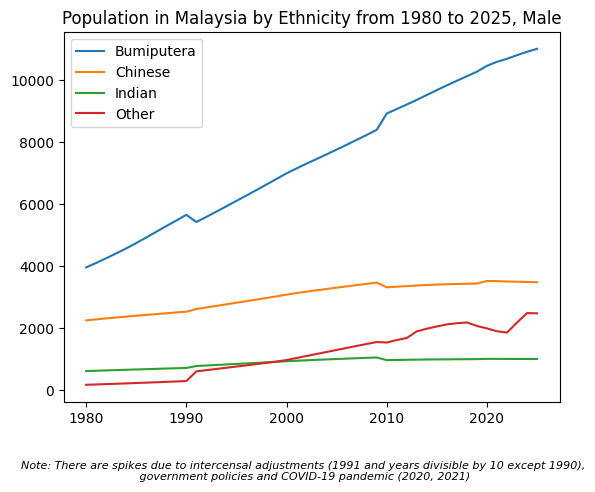

In [13]:
fig, ax = plt.subplots()

ax.plot(malaysia_male_ethnicity_data_pt_copy["year"], malaysia_male_ethnicity_data_pt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_male_ethnicity_data_pt_copy["year"], malaysia_male_ethnicity_data_pt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_male_ethnicity_data_pt_copy["year"], malaysia_male_ethnicity_data_pt_copy["Indian"], label = "Indian")
ax.plot(malaysia_male_ethnicity_data_pt_copy["year"], malaysia_male_ethnicity_data_pt_copy["Other"], label = "Other")
plt.title("Population in Malaysia by Ethnicity from 1980 to 2025, Male")
ax.legend()
plt.figtext(
    0.5, -0.05, 
    "Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

In [14]:
malaysia_male_ethnicity_data_growthpt = malaysia_male_ethnicity_data_pt.pct_change()
malaysia_male_ethnicity_data_growthpt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,NaN,NaN,NaN,NaN
1981,0.036403,0.013959,0.017410,0.061556
1982,0.036930,0.013723,0.017751,0.063457
1983,0.036555,0.012629,0.016342,0.059156
1984,0.036446,0.011916,0.014533,0.056824
1985,0.037704,0.012283,0.014934,0.054688
1986,0.038086,0.011717,0.015165,0.054031
1987,0.037420,0.009932,0.015530,0.049607
1988,0.035875,0.010324,0.014273,0.049626


In [15]:
malaysia_male_ethnicity_data_growthpt_copy = malaysia_male_ethnicity_data_growthpt.reset_index()
malaysia_male_ethnicity_data_growthpt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,NaN,NaN,NaN,NaN
1,1981,0.036403,0.013959,0.017410,0.061556
2,1982,0.036930,0.013723,0.017751,0.063457
3,1983,0.036555,0.012629,0.016342,0.059156
4,1984,0.036446,0.011916,0.014533,0.056824
5,1985,0.037704,0.012283,0.014934,0.054688
6,1986,0.038086,0.011717,0.015165,0.054031
7,1987,0.037420,0.009932,0.015530,0.049607
8,1988,0.035875,0.010324,0.014273,0.049626
9,1989,0.033838,0.011794,0.012924,0.051407


Text(0.5, -0.05, 'Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)')

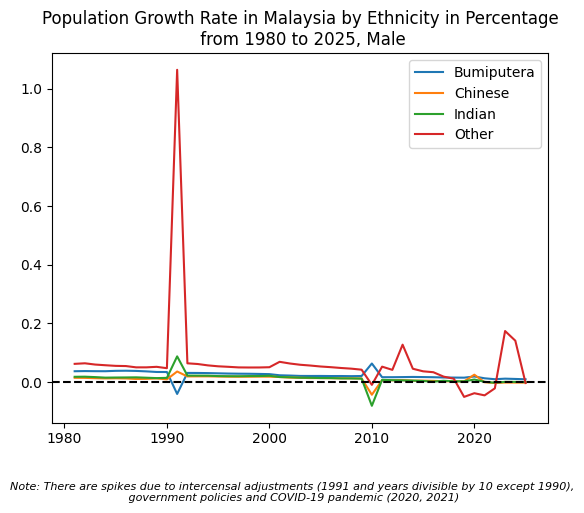

In [16]:
fig, ax = plt.subplots()

ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Indian"], label = "Indian")
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Other"], label = "Other")
plt.title("Population Growth Rate in Malaysia by Ethnicity in Percentage\n from 1980 to 2025, Male")
plt.axhline(y = 0, linestyle = "--", color = "black")
ax.legend()
plt.figtext(
    0.5, -0.05, 
    "Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

For male, there is a general downward trend for Bumiputera, Chinese, and Indian if we ignore spikes

Text(0.5, 0, 'Note: Spikes in 1991, 2000, 2001, 2010, and 2020 are removed')

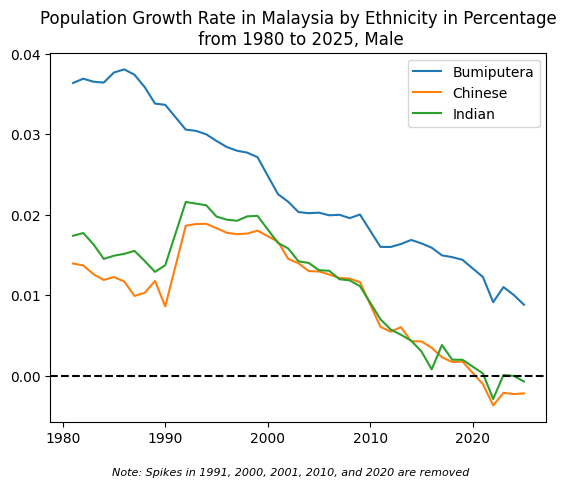

In [17]:
fig, ax = plt.subplots()
malaysia_male_ethnicity_data_growthpt_copy = malaysia_male_ethnicity_data_growthpt_copy.drop(index = [11, 20, 30, 40])
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_male_ethnicity_data_growthpt_copy["year"], malaysia_male_ethnicity_data_growthpt_copy["Indian"], label = "Indian")

plt.title("Population Growth Rate in Malaysia by Ethnicity in Percentage\n from 1980 to 2025, Male")
plt.axhline(y = 0, linestyle = "--", color = "black")

ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: Spikes in 1991, 2000, 2001, 2010, and 2020 are removed",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Plot for Female

In [18]:
malaysia_female_ethnicity_data_pt = malaysia_female_ethnicity_data.pivot_table("population", index = "year", columns = ["ethnicity_group"], aggfunc="sum")
malaysia_female_ethnicity_data_pt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,3971.1,2210.7,575.0,130.5
1981,4101.0,2240.1,587.6,139.6
1982,4238.2,2269.4,600.3,149.3
1983,4380.1,2296.2,612.0,158.9
1984,4526.1,2321.5,623.7,168.8
1985,4686.4,2348.9,635.6,179.0
1986,4854.1,2374.0,647.6,189.3
1987,5024.1,2394.8,660.3,199.8
1988,5193.5,2417.4,671.6,210.5


In [19]:
malaysia_female_ethnicity_data_pt_copy = malaysia_female_ethnicity_data_pt.reset_index()
malaysia_female_ethnicity_data_pt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,3971.1,2210.7,575.0,130.5
1,1981,4101.0,2240.1,587.6,139.6
2,1982,4238.2,2269.4,600.3,149.3
3,1983,4380.1,2296.2,612.0,158.9
4,1984,4526.1,2321.5,623.7,168.8
5,1985,4686.4,2348.9,635.6,179.0
6,1986,4854.1,2374.0,647.6,189.3
7,1987,5024.1,2394.8,660.3,199.8
8,1988,5193.5,2417.4,671.6,210.5
9,1989,5358.8,2443.2,682.2,221.4


In [20]:
malaysia_female_ethnicity_data_pt_copy = malaysia_female_ethnicity_data_pt.reset_index()
malaysia_female_ethnicity_data_pt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,3971.1,2210.7,575.0,130.5
1,1981,4101.0,2240.1,587.6,139.6
2,1982,4238.2,2269.4,600.3,149.3
3,1983,4380.1,2296.2,612.0,158.9
4,1984,4526.1,2321.5,623.7,168.8
5,1985,4686.4,2348.9,635.6,179.0
6,1986,4854.1,2374.0,647.6,189.3
7,1987,5024.1,2394.8,660.3,199.8
8,1988,5193.5,2417.4,671.6,210.5
9,1989,5358.8,2443.2,682.2,221.4


Text(0.5, -0.05, 'Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)')

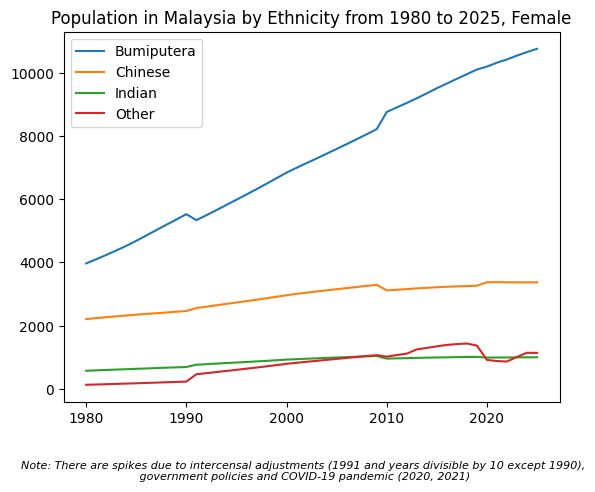

In [21]:
fig, ax = plt.subplots()

ax.plot(malaysia_female_ethnicity_data_pt_copy["year"], malaysia_female_ethnicity_data_pt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_female_ethnicity_data_pt_copy["year"], malaysia_female_ethnicity_data_pt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_female_ethnicity_data_pt_copy["year"], malaysia_female_ethnicity_data_pt_copy["Indian"], label = "Indian")
ax.plot(malaysia_female_ethnicity_data_pt_copy["year"], malaysia_female_ethnicity_data_pt_copy["Other"], label = "Other")
plt.title("Population in Malaysia by Ethnicity from 1980 to 2025, Female")
ax.legend()
plt.figtext(
    0.5, -0.05, 
    "Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

In [22]:
malaysia_female_ethnicity_data_growthpt = malaysia_female_ethnicity_data_pt.pct_change()
malaysia_female_ethnicity_data_growthpt

ethnicity_group,Bumiputera,Chinese,Indian,Other
year,,,,
1980,NaN,NaN,NaN,NaN
1981,0.032711,0.013299,0.021913,0.069732
1982,0.033455,0.013080,0.021613,0.069484
1983,0.033481,0.011809,0.019490,0.064300
1984,0.033333,0.011018,0.019118,0.062303
1985,0.035417,0.011803,0.019080,0.060427
1986,0.035784,0.010686,0.018880,0.057542
1987,0.035022,0.008762,0.019611,0.055468
1988,0.033717,0.009437,0.017113,0.053554


In [23]:
malaysia_female_ethnicity_data_growthpt_copy = malaysia_female_ethnicity_data_growthpt.reset_index()
malaysia_female_ethnicity_data_growthpt_copy

ethnicity_group,year,Bumiputera,Chinese,Indian,Other
0,1980,NaN,NaN,NaN,NaN
1,1981,0.032711,0.013299,0.021913,0.069732
2,1982,0.033455,0.013080,0.021613,0.069484
3,1983,0.033481,0.011809,0.019490,0.064300
4,1984,0.033333,0.011018,0.019118,0.062303
5,1985,0.035417,0.011803,0.019080,0.060427
6,1986,0.035784,0.010686,0.018880,0.057542
7,1987,0.035022,0.008762,0.019611,0.055468
8,1988,0.033717,0.009437,0.017113,0.053554
9,1989,0.031828,0.010673,0.015783,0.051781


Similar trend is observed for female

Text(0.5, -0.05, 'Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)')

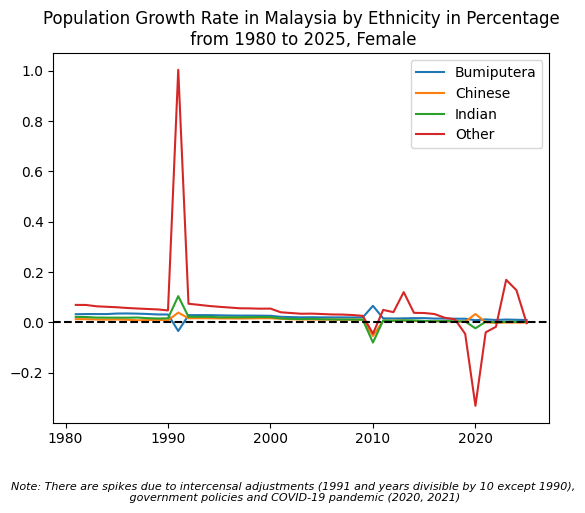

In [24]:
fig, ax = plt.subplots()

ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Indian"], label = "Indian")
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Other"], label = "Other")
plt.title("Population Growth Rate in Malaysia by Ethnicity in Percentage\n from 1980 to 2025, Female")
plt.axhline(y = 0, linestyle = "--", color = "black")
ax.legend()
plt.figtext(
    0.5, -0.05, 
    "Note: There are spikes due to intercensal adjustments (1991 and years divisible by 10 except 1990),\n government policies and COVID-19 pandemic (2020, 2021)",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Text(0.5, 0, 'Note: Spikes in 1991, 2000, 2001, 2010, and 2020 are removed')

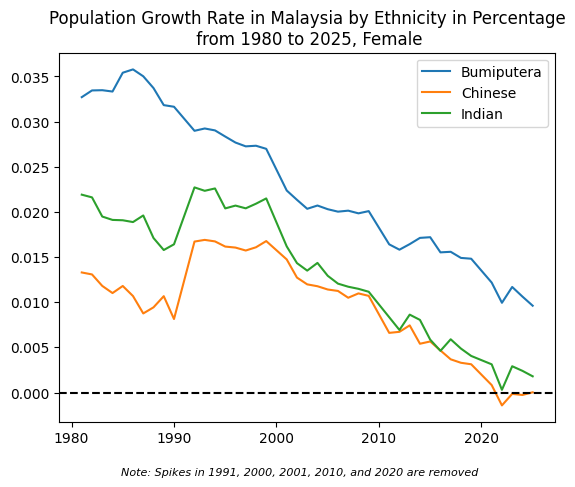

In [25]:
fig, ax = plt.subplots()
malaysia_female_ethnicity_data_growthpt_copy = malaysia_female_ethnicity_data_growthpt_copy.drop(index = [11, 20, 30, 40])
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Bumiputera"], label = "Bumiputera")
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Chinese"], label = "Chinese")
ax.plot(malaysia_female_ethnicity_data_growthpt_copy["year"], malaysia_female_ethnicity_data_growthpt_copy["Indian"], label = "Indian")

plt.title("Population Growth Rate in Malaysia by Ethnicity in Percentage\n from 1980 to 2025, Female")
plt.axhline(y = 0, linestyle = "--", color = "black")

ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: Spikes in 1991, 2000, 2001, 2010, and 2020 are removed",
    wrap=True, ha='center', fontsize=8, style='italic'
)